In [1]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

## Import jeu de train, test, validation

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten

# Définir les chemins des répertoires contenant vos images d'entraînement, de test et de validation
train_dir = 'C:\\Users\\Utilisateur\\Documents\\12_non supervise\\Alien_Predator\\Train'
test_dir = 'C:\\Users\\Utilisateur\\Documents\\12_non supervise\\Alien_Predator\\Test'
validation_dir = 'C:\\Users\\Utilisateur\\Documents\\12_non supervise\\Alien_Predator\\Validation'


# Définir la taille des images d'entrée et d'autres paramètres de prétraitement
img_size = (150, 150)
batch_size = 494


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

# Créez un générateur d'images avec prétraitement pour l'ensemble d'entraînement (train)
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Créez un générateur d'images avec prétraitement pour l'ensemble de validation
validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Créez un générateur d'images avec prétraitement pour l'ensemble de test
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Utilisez les générateurs pour charger et prétraiter les ensembles de formation (train), de validation et de test
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=495,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=200,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=200,
    class_mode='binary'
)


Found 494 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [15]:
class_names = list(train_generator.class_indices.keys())
class_names

['Alien', 'Predator']

In [5]:
# Extraction des données d'entraînement
X_train, y_train = next(train_generator)

# Extraction des données de test
X_test, y_test = next(test_generator)

# Extraction des données de validation
X_val, y_val = next(validation_generator)
X_train.shape, y_train.shape

((494, 150, 150, 3), (494,))

# Charger le modèle VGG16 pré-entraîné et extraire les caractéristiques des images

In [25]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Charger le modèle ResNet-50 pré-entraîné
base_model = ResNet50(weights='imagenet', include_top=False)

# Utiliser le modèle pour extraire des caractéristiques
train_features = base_model.predict(train_generator)
validation_features = base_model.predict(validation_generator)
test_features = base_model.predict(test_generator)



1/1 [==============================] - 5s 5s/step


### Aplatir les caractéristiques extraites

In [26]:
# Assurez-vous d'aplatir les caractéristiques si nécessaire (en fonction du modèle)
train_features = train_features.reshape(train_features.shape[0], -1)
validation_features = validation_features.reshape(validation_features.shape[0], -1)
test_features = test_features.reshape(test_features.shape[0], -1)


In [27]:
train_features.shape, train_features_flatten.shape


((494, 51200), (494, 8192))

## Creer un perceptron multi-couches pour entrainer le modele 

In [28]:
# Créer un MLP pour la classification binaire
mlp_model = models.Sequential()

mlp_model.add(layers.Dense(units=256, activation='relu', input_dim=4 * 4 * 512))

mlp_model.add(layers.Dense(units=1, activation='sigmoid'))


In [29]:
# Compiler le modèle MLP
mlp_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [30]:
# Entraîner le modèle MLP sur les caractéristiques extraites
mlp_history = mlp_model.fit(
    train_features_flatten,
    y_train,
    batch_size = 494,
    epochs=100,
    validation_data=(validation_features_flatten, y_val),
    verbose=1
)



Epoch 1/100
1/1 [==============================] - 1s 773ms/step - loss: 5.3343 - accuracy: 0.5263 - val_loss: 4.9807 - val_accuracy: 0.5800
Epoch 2/100
1/1 [==============================] - 0s 79ms/step - loss: 4.5111 - accuracy: 0.5870 - val_loss: 2.9873 - val_accuracy: 0.6400
Epoch 3/100
1/1 [==============================] - 0s 82ms/step - loss: 2.0514 - accuracy: 0.7186 - val_loss: 2.0256 - val_accuracy: 0.7050
Epoch 4/100
1/1 [==============================] - 0s 75ms/step - loss: 0.9056 - accuracy: 0.8421 - val_loss: 2.1809 - val_accuracy: 0.7350
Epoch 5/100
1/1 [==============================] - 0s 81ms/step - loss: 0.8292 - accuracy: 0.8543 - val_loss: 2.1126 - val_accuracy: 0.7600
Epoch 6/100
1/1 [==============================] - 0s 74ms/step - loss: 0.5923 - accuracy: 0.8887 - val_loss: 1.6961 - val_accuracy: 0.7900
Epoch 7/100
1/1 [==============================] - 0s 79ms/step - loss: 0.3026 - accuracy: 0.9453 - val_loss: 1.3054 - val_accuracy: 0.8250
Epoch 8/100
1/1 [==

In [31]:
# Évaluer le modèle MLP sur les caractéristiques de test
test_loss, test_accuracy = mlp_model.evaluate(test_features_flatten, y_test)
print("Test accuracy:", test_accuracy)


7/7 [==============================] - 0s 4ms/step - loss: 0.9880 - accuracy: 0.8650
Test accuracy: 0.8650000095367432


### Visualize training results

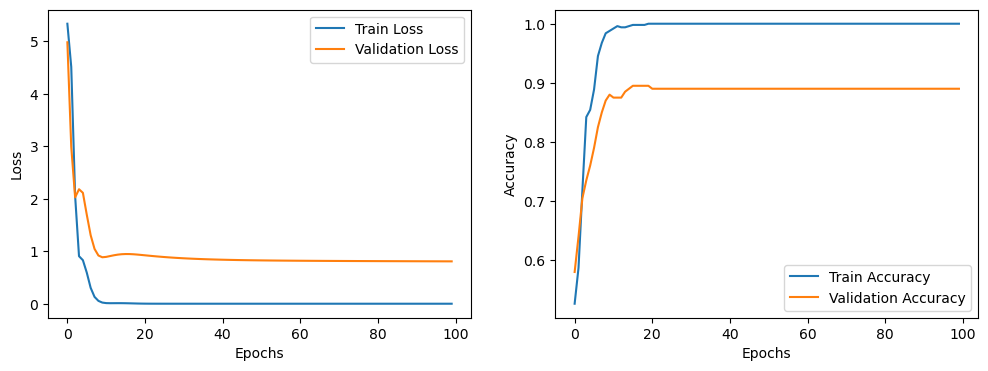

In [32]:
import matplotlib.pyplot as plt


# Tracer les courbes de perte et de précision
plt.figure(figsize=(12, 4))

# Courbes de perte
plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['loss'], label='Train Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbes de précision
plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['accuracy'], label='Train Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


### Évaluez le modèle sur l'ensemble de test

In [33]:
# Évaluer le modèle sur l'ensemble d'entraînement
train_loss, train_accuracy = mlp_model.evaluate(train_features_flatten, y_train)
print("Train accuracy:", train_accuracy)

# Évaluer le modèle sur l'ensemble de validation
validation_loss, validation_accuracy = mlp_model.evaluate(validation_features_flatten, y_val)
print("Validation accuracy:", validation_accuracy)

# Évaluer le modèle sur l'ensemble de test
test_loss, test_accuracy = mlp_model.evaluate(test_features_flatten, y_test)
print("Test accuracy:", test_accuracy)


16/16 [==============================] - 0s 3ms/step - loss: 1.8303e-05 - accuracy: 1.0000
Train accuracy: 1.0
7/7 [==============================] - 0s 3ms/step - loss: 0.8070 - accuracy: 0.8900
Validation accuracy: 0.8899999856948853
7/7 [==============================] - 0s 4ms/step - loss: 0.9880 - accuracy: 0.8650
Test accuracy: 0.8650000095367432


In [34]:
# Obtenir les prédictions sur l'ensemble d'entraînement
y_train_pred = mlp_model.predict(train_features_flatten)

# Obtenir les prédictions sur l'ensemble de validation
y_val_pred = mlp_model.predict(validation_features_flatten)

# Obtenir les prédictions sur l'ensemble de test
y_test_pred = mlp_model.predict(test_features_flatten)


7/7 [==============================] - 0s 3ms/step


In [35]:
# Conversion des probabilités
y_pred_train_prob= [1 if prob > 0.5 else 0 for prob in np.ravel(y_train_pred)]
print(y_pred_train_prob[:10])

y_pred_test_prob= [1 if prob > 0.5 else 0 for prob in np.ravel(y_test_pred)]
print(y_pred_test_prob[:10])

y_pred_val_prob= [1 if prob > 0.5 else 0 for prob in np.ravel(y_val_pred)]
print(y_pred_val_prob[:10])

[0, 0, 0, 0, 1, 1, 0, 1, 1, 1]
[1, 1, 1, 0, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0]


In [36]:
# Matrice de confusion jeu d'apprentissage
print("Matrice de confusion jeu d'apprentissage ")
print(confusion_matrix(y_train, y_pred_train_prob))

# Matrice de confusion jeu de test
print("Matrice de confusion jeu de test")
print(confusion_matrix(y_test, y_pred_test_prob))

# Matrice de confusion jeu de test
print("Matrice de confusion jeu de test")
print(confusion_matrix(y_val, y_pred_val_prob))

Matrice de confusion jeu d'apprentissage 
[[247   0]
 [  0 247]]
Matrice de confusion jeu de test
[[83 17]
 [10 90]]
Matrice de confusion jeu de test
[[83 17]
 [ 5 95]]


In [37]:
print(classification_report(y_test, y_pred_test_prob))


              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86       100
         1.0       0.84      0.90      0.87       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200

